<a href="https://colab.research.google.com/github/jpastor1649/Teoinfo-2025I/blob/main/LABS/CodificacionTeoinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$Teoria$ $de$ $la$ $Información$ $y$ $Sistemas$ $de$ $Comunicaciones$

$2025-1$

$John$ $Alejandro$ $Pastor$ $Sandoval$

$Laura$ $Andrea$ $Castiblanco$ $Suarez$

$Daniel$ $Alejandro$ $Acosta$ $Avila$







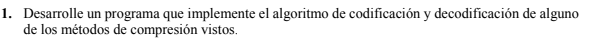

In [ ]:
from decimal import Decimal, getcontext
import matplotlib.pyplot as plt

# Aumenta la precisión para cálculos decimales
getcontext().prec = 100

# Calcula la frecuencia absoluta y relativa de los símbolos en el mensaje
def calc_frequencies(message) -> tuple[dict, dict]:
    freqs = {}
    for s in message:
        freqs[s] = freqs.get(s, 0) + 1  # Cuenta cuántas veces aparece cada símbolo

    total = Decimal(len(message))  # Número total de símbolos
    probs = {s: Decimal(freqs[s]) / total for s in freqs}  # Probabilidad relativa

    return freqs, probs


# Calcula los intervalos [low, high) para cada símbolo en el mensaje
def calc_intervals(probs: dict) -> dict:
    intervals = {}
    low = Decimal('0')  # Intervalo inicial

    # Se ordenan los símbolos alfabéticamente para mantener consistencia
    for s, prob in sorted(probs.items()):
        high = low + prob  # Define el extremo superior del intervalo
        intervals[s] = (low, high)
        low = high  # El nuevo "low" será el high del anterior

    return intervals

# Codifica el mensaje como un número decimal dentro del intervalo [0,1)
def arithmetic_encode(message, intervals: dict) -> tuple:
    low = Decimal('0')
    high = Decimal('1')

    for s in message:
        simb_low, simb_high = intervals[s]   # Se obtiene el subintervalo del símbolo actual
        range_width = high - low   # Se calcula el tamaño del intervalo actual

        # Se reduce el intervalo según los subintervalos del símbolo
        high = low + range_width * simb_high    #newhigh
        low = low + range_width * simb_low      #lowhigh

    # El número resultante representa todo el mensaje
    tag = (low + high) / 2
    return tag, low, high

# Decodifica el número decimal reconstruyendo el mensaje original paso a paso
def arithmetic_decode(code: Decimal, intervals: dict, message_len: int) -> str:
    message = ""  # Aquí construiremos el mensaje decodificado

    print("\n--- Paso a paso de la decodificación ---")

    for i in range(message_len):  # Repetimos tantas veces como símbolos tenga el mensaje original
        print(f"\nPaso {i+1}:")
        print(f"  Código actual: {code}")  # Muestra el valor actual del "tag" en esta iteración

        for simb, (low, high) in intervals.items():  # Recorremos cada símbolo y su intervalo
            # Si el código actual está dentro del intervalo de este símbolo
            if low <= code < high:
                message += simb  # Añadimos el símbolo al mensaje reconstruido
                print(f"  Símbolo encontrado: '{simb}' (Intervalo: [{low}, {high}))")

                # Reescalamos el código: lo mapeamos al intervalo [0,1) para la siguiente iteración
                code = (code - low) / (high - low)
                print(f"  Nuevo código reescalado: {code}")
                break  # Ya encontramos el símbolo correcto, no seguimos buscando
    return message


In [ ]:
def plot_frequencies(probs):
    symbols = list(probs.keys())
    values = [float(p) for p in probs.values()]

    plt.figure(figsize=(10, 5))
    plt.bar(symbols, values, color='skyblue')
    plt.title("Probabilidades de los símbolos")
    plt.xlabel("Símbolos")
    plt.ylabel("Probabilidad")
    plt.grid(True, axis='y')
    plt.show()


def plot_intervals(intervals):
    import matplotlib.pyplot as plt

    symbols = []
    lows = []
    widths = []

    for s, (low, high) in sorted(intervals.items()):
        symbols.append(s)
        lows.append(float(low))
        widths.append(float(high - low))

    plt.figure(figsize=(10, 2))
    plt.barh([1]*len(symbols), widths, left=lows, edgecolor='black')
    for i, s in enumerate(symbols):
        plt.text(lows[i] + widths[i]/2, 1, s, ha='center', va='center')
    plt.title("Intervalos acumulativos por símbolo")
    plt.yticks([])
    plt.xlabel("Intervalo [0, 1)")
    plt.show()


Frecuencia y Probabilidades:
a: 2 veces, 0.500000
c: 1 veces, 0.250000
s: 1 veces, 0.250000


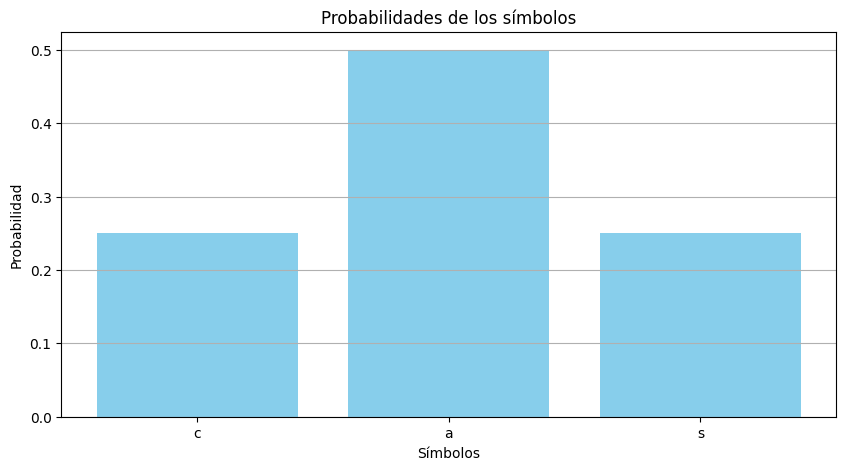


Intervalos:
a: [0, 0.5)
c: [0.5, 0.75)
s: [0.75, 1.00)


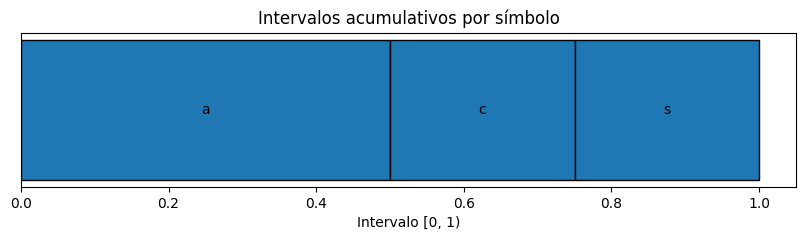


Código aritmético del mensaje 'casa':
0.6015625
Intervalo final del mensaje: [0.59375, 0.609375)

--- Paso a paso de la decodificación ---

Paso 1:
  Código actual: 0.6015625
  Símbolo encontrado: 'c' (Intervalo: [0.5, 0.75))
  Nuevo código reescalado: 0.40625

Paso 2:
  Código actual: 0.40625
  Símbolo encontrado: 'a' (Intervalo: [0, 0.5))
  Nuevo código reescalado: 0.8125

Paso 3:
  Código actual: 0.8125
  Símbolo encontrado: 's' (Intervalo: [0.75, 1.00))
  Nuevo código reescalado: 0.25

Paso 4:
  Código actual: 0.25
  Símbolo encontrado: 'a' (Intervalo: [0, 0.5))
  Nuevo código reescalado: 0.5

Decodificación:
Mensaje decodificado: casa


In [ ]:
def main():
    # message = "Thequickbrownfoxjumpsoverthelazydog"
    # message = "....asd*}{-´<.,.?¡24°|}."
    message = "casa"
    # message = "123"
    # message = "esternocleidomastoideo"
    # message = "parangaricutirimicuaro"

    # Paso 1: calcular las probabilidades
    freqs, probs = calc_frequencies(message)
    print("\nFrecuencia y Probabilidades:")
    for s in sorted(freqs.keys()):
        print(f"{s}: {freqs[s]} veces, {probs[s]:.6f}")
    plot_frequencies(probs=probs)

    # Paso 2: calcular los intervalos acumulativos
    intervals = calc_intervals(probs)
    print("\nIntervalos:")
    for s, (low, high) in intervals.items():
        print(f"{s}: [{low}, {high})")
    plot_intervals(intervals=intervals)

    # Paso 3: codificar el mensaje completo como número decimal
    tag, final_low, final_high = arithmetic_encode(message, intervals)
    print(f"\nCódigo aritmético del mensaje '{message}':\n{tag}")
    print(f"Intervalo final del mensaje: [{final_low}, {final_high})")


    # Paso 4: decodificar el número para obtener el mensaje original
    decoded_message = arithmetic_decode(tag, intervals, len(message))
    print("\nDecodificación:")
    print(f"Mensaje decodificado: {decoded_message}")

    # Paso 5: Verificación de exactitud
    assert decoded_message == message, "Decoded message does not match the original"

if __name__ == "__main__":
    main()

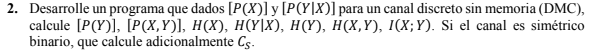

P(Y): [0.35 0.65]
P(X,Y): [[0.1  0.4 ]
 [0.25 0.25]]
H(X): 1.0
H(Y|X): 0.8609640474436812
H(Y): 0.934068055375491
H(X,Y): 1.860964047443681
I(X;Y): 0.07310400793180982


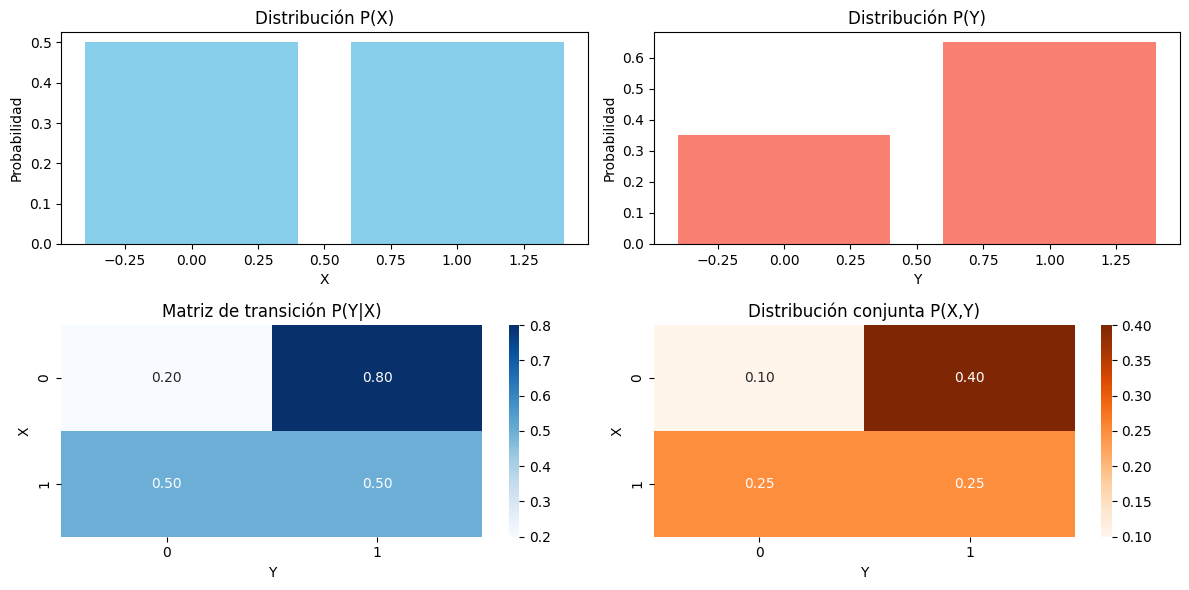

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def entropy(probabilities):
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log2(probabilities))

def joint_entropy(Pxy):
    return entropy(Pxy.flatten())

def conditional_entropy(Pxy, Px):
    H_Y_given_X = 0
    for i, px in enumerate(Px):
        if px > 0:
            H_Y_given_X += px * entropy(Pxy[i, :] / px)
    return H_Y_given_X

def compute_information_quantities(Px, Py_given_x):
    # Cálculo de P(Y)
    Py = np.dot(Px, Py_given_x)

    # Cálculo de P(X,Y) usando matriz diagonal
    Px_diag = np.diag(Px)
    Pxy = Px_diag @ Py_given_x

    # Cálculo de entropías e información mutua
    H_X = entropy(Px)
    H_Y = entropy(Py)
    H_XY = joint_entropy(Pxy)
    H_Y_given_X = conditional_entropy(Pxy, Px)
    I_XY = H_Y - H_Y_given_X

    return {
        'P(Y)': Py,
        'P(X,Y)': Pxy,
        'H(X)': H_X,
        'H(Y|X)': H_Y_given_X,
        'H(Y)': H_Y,
        'H(X,Y)': H_XY,
        'I(X;Y)': I_XY
    }

def plot_probabilities(Px, Py, Py_given_x, Pxy):
    # Plot de P(X)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.bar(range(len(Px)), Px, color='skyblue')
    plt.title("Distribución P(X)")
    plt.xlabel("X")
    plt.ylabel("Probabilidad")

    # Plot de P(Y)
    plt.subplot(2, 2, 2)
    plt.bar(range(len(Py)), Py, color='salmon')
    plt.title("Distribución P(Y)")
    plt.xlabel("Y")
    plt.ylabel("Probabilidad")

    # Heatmap de P(Y|X)
    plt.subplot(2, 2, 3)
    sns.heatmap(Py_given_x, annot=True, cmap='Blues', cbar=True, fmt=".2f")
    plt.title("Matriz de transición P(Y|X)")
    plt.xlabel("Y")
    plt.ylabel("X")

    # Heatmap de P(X,Y)
    plt.subplot(2, 2, 4)
    sns.heatmap(Pxy, annot=True, cmap='Oranges', cbar=True, fmt=".2f")
    plt.title("Distribución conjunta P(X,Y)")
    plt.xlabel("Y")
    plt.ylabel("X")

    plt.tight_layout()
    plt.show()

def is_binary_symmetric_channel(P):
    # 1. Comprobar que es una matriz 2x2
    if P.shape != (2, 2):
        return False, None

    # 2. Verificar que cada fila suma 1
    if not np.allclose(P.sum(axis=1), [1, 1], atol=1e-8):
        return False, None

    # 3. Extraer probabilidades
    p1 = P[0, 1]  # Probabilidad de error en fila 1
    p2 = P[1, 0]  # Probabilidad de error en fila 2

    # 4. Comprobar si son iguales (dentro de un margen de error)
    if np.isclose(p1, p2, atol=1e-8):
        return True, p1  # Es un canal binario simétrico, retorna p
    else:
        return False, None

def binary_symmetric_capacity(p):
    # Capacidad del canal binario simétrico (BSC)
    if p == 0 or p == 1:
        Hb = 0
    else:
        Hb = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    return 1 - Hb

# Ejemplo de uso:
def main(Px = np.array([0.5, 0.5]),
         Py_given_x = np.array([
          [0.2, 0.8],  # P(Y|X=0)
          [0.5, 0.5]   # P(Y|X=1)
        ])):

    results = compute_information_quantities(Px, Py_given_x)

    for key, value in results.items():
        print(f"{key}: {value}")

    BS, p = is_binary_symmetric_channel(Py_given_x)
    #print(f"Es canal binario simétrico? {BS}")

    # Si es un canal binario simétrico
    if BS:
      #p = 0.1 #Probabilidad de error
      Cs = binary_symmetric_capacity(p)
      print(f"Capacidad del canal binario simétrico Cs: {Cs:.4f}")

    plot_probabilities(Px, results['P(Y)'], Py_given_x, results['P(X,Y)'])

main()

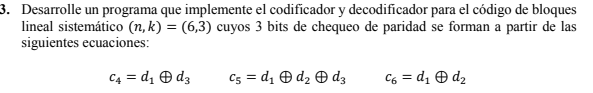

In [ ]:
import numpy as np
import itertools

# --- Parámetros iniciales del problema ---
# Basado en el código de bloques lineal sistemático (n,k) = (6,3)

# Un código de bloque lineal sistemático (n,k) es un esquema de corrección de errores que:
# Divide los datos en bloques de k bits.
# Añade bits redundantes para formar palabras de n bits (n > k).
# Es sistemático: Los primeros k bits son los datos originales, seguidos de m = n-k bits de paridad.

# Ecuaciones de paridad:
# c4 = d1 + d3
# c5 = d1 + d2 + d3
# c6 = d1 + d2

# Vector de datos: d = [d1, d2, d3]
# Vector de paridad: p = [c4, c5, c6]
# Palabra de código: c = [d1, d2, d3, c4, c5, c6]

# (a) Escribir la matriz generadora G
# -----------------------------------------------------------------
print("### (a) Matriz Generadora (G) ###")

# La matriz P se deriva de las ecuaciones de paridad.
# Cada columna de P corresponde a los coeficientes de d1, d2, d3 para cada bit de paridad.
#   c4 c5 c6
# d1|1  1  1|
# d2|0  1  1|
# d3|1  1  0|
P = np.array([
    [1, 1, 1],
    [0, 1, 1],
    [1, 1, 0]
])

# Para un código sistemático, G = [I_k | P]
k = 3
I_k = np.identity(k, dtype=int)
G = np.concatenate((I_k, P), axis=1)

print("La matriz de paridad P es:")
print(P)
print("\nLa matriz generadora G = [I_3 | P] es:")
print(G)
print("-" * 40)


# (b) Construir todas las posibles palabras de código
# -----------------------------------------------------------------
print("\n### (b) Todas las Palabras de Código Posibles ###")
#c = d * G
# Generar todas las 2^k = 8 posibles palabras de datos (mensajes)
data_words = list(itertools.product([0, 1], repeat=k))

# Almacenar las palabras de código resultantes
code_words = []

print("Mensaje (d) | Palabra de Código (c = dG) | Peso de Hamming")
print("-----------------------------------------------------------")
for d_tuple in data_words:
    d = np.array(d_tuple)
    # Codificación: c = d * G (mod 2)
    c = d.dot(G) % 2
    code_words.append(c)
    peso = np.sum(c)
    print(f"{d}     | {c}              | {peso}")

print("-" * 60)
print("-" * 60)

# (c) Decodificar la palabra recibida r = 010111 usando el síndrome (r*H^T)
# -----------------------------------------------------------------
print("\n### (c) Decodificación por Síndrome ###")
r = np.array([0, 1, 0, 1, 1, 1])
print(f"Palabra recibida (r): {r}")

# Para decodificar, necesitamos la matriz de control de paridad H.
# Para un código sistemático, H^T = [P^T | I_(n-k)]
n = 6
I_nk = np.identity(n - k, dtype=int)
H = np.concatenate((P.T, I_nk), axis=1)
print("\nLa matriz de control de paridad H = [P^T | I_3] es:")
print(H.T)

# Calcular el síndrome: S = r * H^T (mod 2)
S = r.dot(H.T) % 2
print(f"\nSíndrome (S = r*(H^T)): {S}")

# Si S es [0, 0, 0], no hay error. Si no, S coincide con una columna de H,
# indicando la posición del error.
if not np.any(S):
    print("El síndrome es cero. No se detectó ningún error.")
    corrected_c = r
else:
    # Buscar el síndrome S en las columnas de H
    # La transpuesta de H (H.T) tiene las columnas de H como filas
    error_pos = -1
    for i, col_as_row in enumerate(H.T):
        if np.array_equal(S, col_as_row):
            # La posición del error es i+1 (indexado desde 1)
            error_pos = i + 1
            break

    if error_pos != -1:
        print(f"El síndrome coincide con la columna {error_pos} de H.")
        print(f"Hay un error en el bit {error_pos}.")

        # Crear el vector de error 'e'
        e = np.zeros(n, dtype=int)
        e[error_pos - 1] = 1
        print(f"Vector de error (e):   {e}")

        # Corregir la palabra: c = r + e (mod 2) o r XOR e
        corrected_c = (r + e) % 2
        print(f"Palabra corregida (c = r+e): {corrected_c}")
    else:
        # Esto ocurriría si hay más errores de los que el código puede detectar/corregir
        print("Error no corregible detectado (el síndrome no coincide con ninguna columna de H).")
        corrected_c = r # No se puede corregir

# Los bits de datos decodificados son los primeros k bits de la palabra corregida
decoded_data = corrected_c[:k]
print(f"\nBits de datos transmitidos (decodificados): {decoded_data}")
print("-" * 40)

# (d) Mostrar que d_min = 3
# -----------------------------------------------------------------
print("\n### (d) Distancia Mínima (d_min) y Capacidad de Corrección ###")

# La distancia mínima (d_min) es el peso de Hamming mínimo de todas las
# palabras de código no nulas.
weights = [np.sum(cw) for cw in code_words if np.any(cw)]
d_min = min(weights)

print(f"Los pesos de Hamming de las palabras de código no nulas son: {weights}")
print(f"La distancia mínima, d_min, es: {d_min}")

# Capacidad de corrección de errores 't'
t = 1 #corrige hasta 1 error
err = (d_min) >= (2*t)+1
print(f"Capacidad de corrección dmin >= 2t + 1, la ecuacion nos da {err} por lo tanto")
print(f"Como t = {t}, el código puede corregir {t} error.")
print("-" * 40)



# (e) Decodificar usando la regla de distancia mínima
#se concluye que la palabra que este a la menor distancia es la palabra que se envio
# -----------------------------------------------------------------
print("\n### (e) Decodificación por Distancia Mínima ###")
print(f"Palabra recibida (r): {r}")
print("\nCalculando la distancia de Hamming entre 'r' y todas las palabras de código válidas:")

distances = []
for cw in code_words:
    # La distancia de Hamming es la suma de los resultados de una operación XOR
    distance = np.sum(r ^ cw)
    distances.append(distance)
    print(f"Distancia(r, {cw}) = {distance}")

# Encontrar la distancia mínima y la palabra de código correspondiente
min_dist = min(distances)
min_dist_index = distances.index(min_dist)
min_dist_codeword = code_words[min_dist_index]

print(f"\nLa distancia mínima es {min_dist}.")
print(f"La palabra de código más cercana a 'r' es: {min_dist_codeword}")

# Los datos decodificados son los primeros k bits de esta palabra
decoded_data_min_dist = min_dist_codeword[:k]
print(f"Bits de datos decodificados: {decoded_data_min_dist}")

# Verificación de consistencia
if np.array_equal(decoded_data, decoded_data_min_dist):
    print("\nEl resultado coincide con el método de decodificación por síndrome. ✅")
else:
    print("\n¡El resultado NO coincide con el método de decodificación por síndrome! ❌")

### (a) Matriz Generadora (G) ###
La matriz de paridad P es:
[[1 1 1]
 [0 1 1]
 [1 1 0]]

La matriz generadora G = [I_3 | P] es:
[[1 0 0 1 1 1]
 [0 1 0 0 1 1]
 [0 0 1 1 1 0]]
----------------------------------------

### (b) Todas las Palabras de Código Posibles ###
Mensaje (d) | Palabra de Código (c = dG) | Peso de Hamming
-----------------------------------------------------------
[0 0 0]     | [0 0 0 0 0 0]              | 0
[0 0 1]     | [0 0 1 1 1 0]              | 3
[0 1 0]     | [0 1 0 0 1 1]              | 3
[0 1 1]     | [0 1 1 1 0 1]              | 4
[1 0 0]     | [1 0 0 1 1 1]              | 4
[1 0 1]     | [1 0 1 0 0 1]              | 3
[1 1 0]     | [1 1 0 1 0 0]              | 3
[1 1 1]     | [1 1 1 0 1 0]              | 4
------------------------------------------------------------
------------------------------------------------------------

### (c) Decodificación por Síndrome ###
Palabra recibida (r): [0 1 0 1 1 1]

La matriz de control de paridad H = [P^T | I_3] es:
[[